In [8]:
#Load data:
import pandas as pd

ipl_df = pd.read_csv('Desktop/ipl-data-analysis/data/IPL.csv', low_memory=False)
ipl_df.head()


,Unnamed: 0,match_id,date,match_type,event_name,innings,batting_team,bowling_team,over,ball,...,team_runs,team_balls,team_wicket,new_batter,batter_runs,batter_balls,bowler_wicket,batting_partners,next_batter,striker_out
0,131970,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,...,1,1,0,NaN,0,1,0,"('BB McCullum', 'SC Ganguly')",NaN,False
1,131971,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,...,1,2,0,NaN,0,1,0,"('BB McCullum', 'SC Ganguly')",NaN,False
2,131972,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,...,2,2,0,NaN,0,1,0,"('BB McCullum', 'SC Ganguly')",NaN,False
3,131973,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,...,2,3,0,NaN,0,2,0,"('BB McCullum', 'SC Ganguly')",NaN,False
4,131974,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,...,2,4,0,NaN,0,3,0,"('BB McCullum', 'SC Ganguly')",NaN,False


In [9]:
# Step 2: Explore the Dataset Structure
# Shape of the dataset
ipl_df.shape

# Data types and nulls
ipl_df.info()

# Summary stats
ipl_df.describe(include='all')

# Check missing values
ipl_df.isnull().sum().sort_values(ascending=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278205 entries, 0 to 278204
Data columns (total 64 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         278205 non-null  int64  
 1   match_id           278205 non-null  int64  
 2   date               278205 non-null  object 
 3   match_type         278205 non-null  object 
 4   event_name         278205 non-null  object 
 5   innings            278205 non-null  int64  
 6   batting_team       278205 non-null  object 
 7   bowling_team       278205 non-null  object 
 8   over               278205 non-null  int64  
 9   ball               278205 non-null  int64  
 10  ball_no            278205 non-null  float64
 11  batter             278205 non-null  object 
 12  bat_pos            278205 non-null  int64  
 13  runs_batter        278205 non-null  int64  
 14  balls_faced        278205 non-null  int64  
 15  bowler             278205 non-null  object 
 16  va

umpire              277333
review_decision     277333
team_reviewed       277333
review_batter       277333
method              274315
                     ...  
team_wicket              0
batter_balls             0
bowler_wicket            0
batting_partners         0
striker_out              0
Length: 64, dtype: int64

In [10]:
#Step 3: General IPL Insights
#1. Total Seasons and Years
ipl_df['season'].nunique(), ipl_df['year'].nunique()
ipl_df['season'].value_counts().sort_index()


season
2007/08    13489
2009       13606
2009/10    14498
2011       17013
2012       17767
2013       18177
2014       14300
2015       13652
2016       14096
2017       13862
2018       14286
2019       14312
2020/21    14559
2021       14425
2022       17912
2023       17863
2024       17103
2025       17285
Name: count, dtype: int64

<Axes: title={'center': 'Matches per Season'}, xlabel='season', ylabel='Matches'>

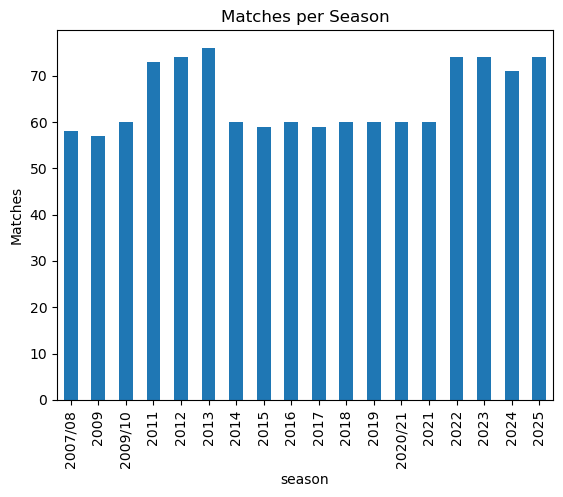

In [11]:
#2. Number of Matches Played Per Season
matches_per_season = ipl_df.drop_duplicates(subset='match_id').groupby('season')['match_id'].count()
matches_per_season.plot(kind='bar', title='Matches per Season', ylabel='Matches')


<Axes: title={'center': 'Top Teams by Wins'}, ylabel='match_won_by'>

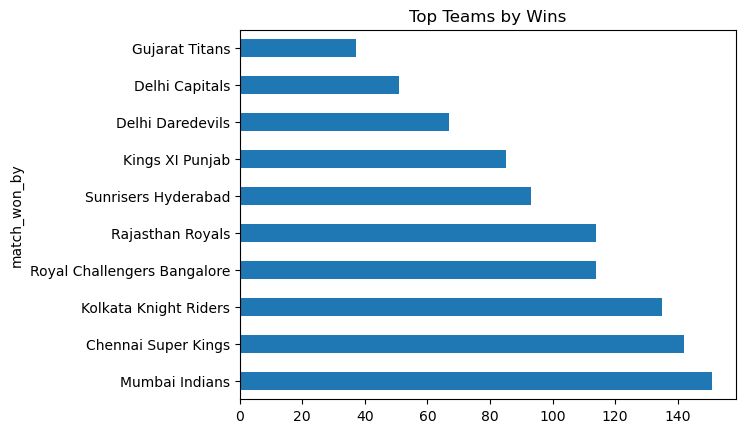

In [12]:
#3. Top Winning Teams
top_teams = ipl_df.drop_duplicates(subset='match_id')['match_won_by'].value_counts().head(10)
top_teams.plot(kind='barh', title='Top Teams by Wins')


<Axes: title={'center': 'Top 10 Run Scorers'}, ylabel='batter'>

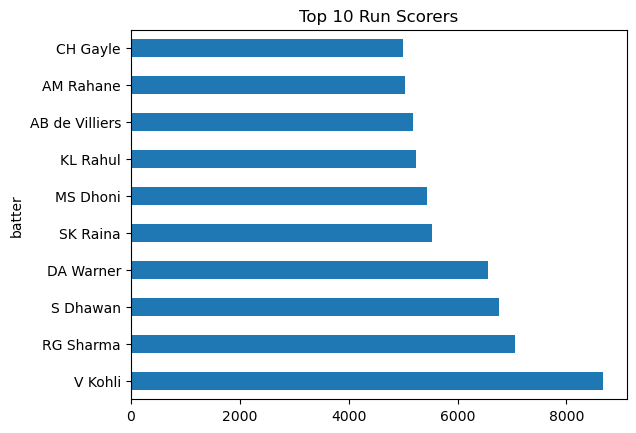

In [13]:
#Step 4: Batting Analysis
#1. Top Run Scorers
top_batters = ipl_df.groupby('batter')['runs_batter'].sum().sort_values(ascending=False).head(10)
top_batters.plot(kind='barh', title='Top 10 Run Scorers')


In [14]:
#2. Best Strike Rates (Min 200 balls faced)
batter_stats = ipl_df.groupby('batter').agg({'runs_batter': 'sum', 'balls_faced': 'sum'})
batter_stats = batter_stats[batter_stats['balls_faced'] >= 200]
batter_stats['strike_rate'] = 100 * batter_stats['runs_batter'] / batter_stats['balls_faced']
batter_stats.sort_values('strike_rate', ascending=False).head(10)


,runs_batter,balls_faced,strike_rate
batter,,,
Priyansh Arya,545,299,182.274247
Naman Dhir,392,217,180.645161
PD Salt,1056,601,175.707155
AD Russell,2655,1525,174.098361
TH David,846,488,173.360656
TM Head,1146,674,170.029674
H Klaasen,1480,872,169.724771
N Pooran,2293,1359,168.727005
SP Narine,1780,1069,166.510758


<Axes: title={'center': 'Top Wicket Takers'}, ylabel='bowler'>

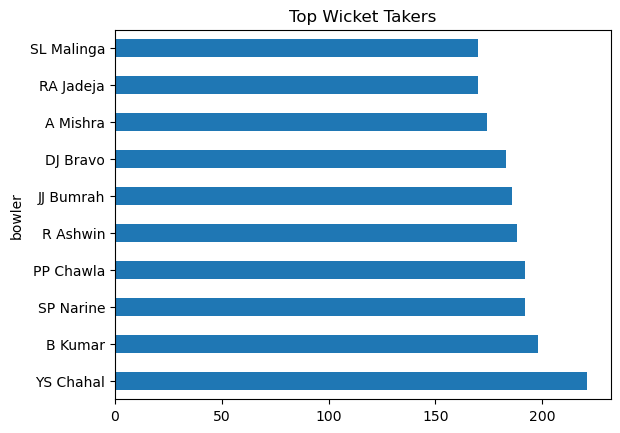

In [15]:
#Step 5: Bowling Analysis
#1. Top Wicket Takers
wickets = ipl_df[ipl_df['wicket_kind'].notna() & (ipl_df['wicket_kind'] != 'run out')]
top_bowlers = wickets['bowler'].value_counts().head(10)
top_bowlers.plot(kind='barh', title='Top Wicket Takers')


In [16]:
#2. Economy Rates (Min 200 balls bowled)
bowler_stats = ipl_df.groupby('bowler').agg({'runs_bowler': 'sum', 'valid_ball': 'sum'})
bowler_stats = bowler_stats[bowler_stats['valid_ball'] >= 200]
bowler_stats['overs'] = bowler_stats['valid_ball'] / 6
bowler_stats['economy'] = bowler_stats['runs_bowler'] / bowler_stats['overs']
bowler_stats.sort_values('economy').head(10)


,runs_bowler,valid_ball,overs,economy
bowler,,,,
A Chandila,242,234,39.000000,6.205128
Sohail Tanvir,266,247,41.166667,6.461538
SM Pollock,301,276,46.000000,6.543478
A Kumble,1058,965,160.833333,6.578238
GD McGrath,357,324,54.000000,6.611111
M Muralitharan,1706,1528,254.666667,6.698953
RE van der Merwe,498,443,73.833333,6.744921
DL Vettori,879,777,129.500000,6.787645
SP Narine,4933,4351,725.166667,6.802574


<Axes: title={'center': 'Impact of Toss on Match Outcome'}, xlabel='toss_win_and_match_win', ylabel='Percentage'>

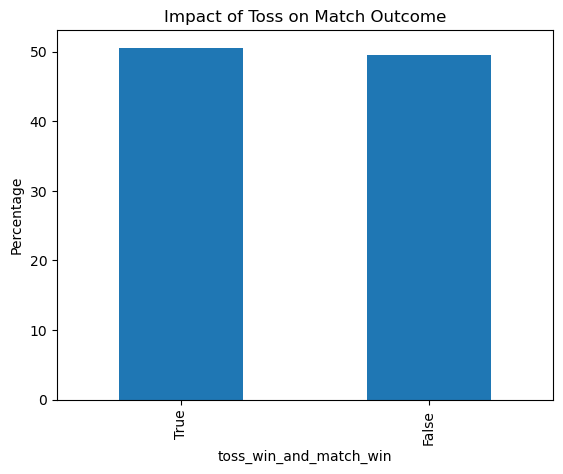

In [24]:
#Step 6: Match Insights
#Toss Impact on Winning
toss_wins = ipl_df.drop_duplicates('match_id').copy()

# Add new column safely
toss_wins['toss_win_and_match_win'] = toss_wins['toss_winner'] == toss_wins['match_won_by']

# Percentage of matches where toss winner also won the match
toss_impact = toss_wins['toss_win_and_match_win'].value_counts(normalize=True) * 100

# Plot
toss_impact.plot(kind='bar', title='Impact of Toss on Match Outcome', ylabel='Percentage')


<Axes: title={'center': 'Win Outcomes (Batting First vs Chasing)'}>

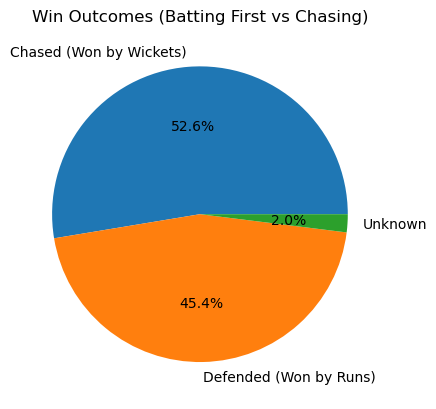

In [25]:
#Win by Batting First vs Chasing (Grouped)
win_data = ipl_df.drop_duplicates('match_id').copy()

# Classify outcomes
def classify_outcome(outcome):
    if pd.isna(outcome):
        return 'Unknown'
    elif 'wicket' in outcome.lower():
        return 'Chased (Won by Wickets)'
    elif 'run' in outcome.lower():
        return 'Defended (Won by Runs)'
    else:
        return 'Other'

win_data['result_type_grouped'] = win_data['win_outcome'].apply(classify_outcome)

# Count and plot
outcome_counts = win_data['result_type_grouped'].value_counts()
outcome_counts.plot(kind='pie', autopct='%1.1f%%', title='Win Outcomes (Batting First vs Chasing)', ylabel='')


<Axes: title={'center': 'Top 10 Venues by Match Count'}, ylabel='venue'>

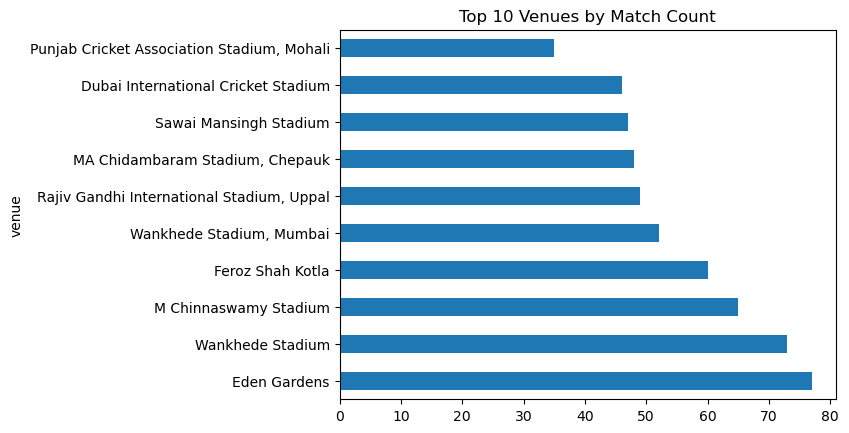

In [19]:
#Step 7: Venue Analysis
venue_stats = ipl_df.drop_duplicates('match_id')['venue'].value_counts().head(10)
venue_stats.plot(kind='barh', title='Top 10 Venues by Match Count')


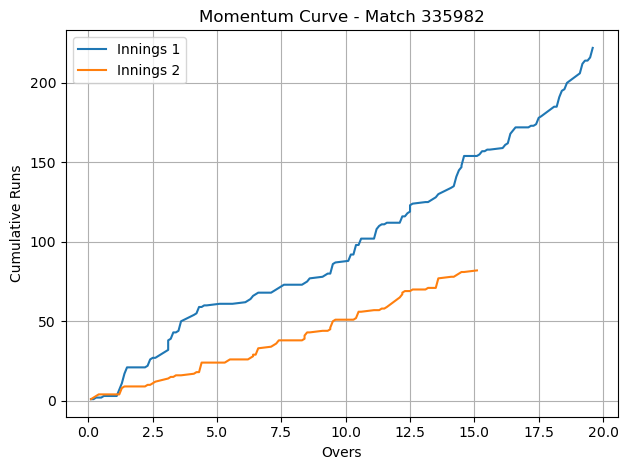

In [26]:
#Match Momentum Analysis (Run Rate Over Time)
import matplotlib.pyplot as plt

# Select a match
match_id = 335982  # Replace with any valid match_id
match_df = ipl_df[ipl_df['match_id'] == match_id]

# Plot momentum for both innings
for inning in [1, 2]:
    df_inning = match_df[match_df['innings'] == inning].copy()
    df_inning['cum_runs'] = df_inning['runs_total'].cumsum()
    df_inning['over_num'] = df_inning['over'] + df_inning['ball'] / 10

    plt.plot(df_inning['over_num'], df_inning['cum_runs'], label=f'Innings {inning}')

plt.title(f'Momentum Curve - Match {match_id}')
plt.xlabel("Overs")
plt.ylabel("Cumulative Runs")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [21]:
# Partnership Analysis
# Group by batting pair
partnerships = ipl_df.groupby(['match_id', 'batting_partners'])['runs_total'].sum().reset_index()

# Top 10 partnerships
top_partnerships = partnerships.sort_values('runs_total', ascending=False).head(10)
print(top_partnerships)


       match_id                     batting_partners  runs_total
7428     980987        ('AB de Villiers', 'V Kohli')         229
6693     829795        ('AB de Villiers', 'V Kohli')         215
14505   1426297  ('B Sai Sudharsan', 'Shubman Gill')         210
12565   1304112            ('KL Rahul', 'Q de Kock')         210
3188     501260         ('AC Gilchrist', 'SE Marsh')         206
15486   1473498  ('B Sai Sudharsan', 'Shubman Gill')         205
4167     548372              ('CH Gayle', 'V Kohli')         204
3651     548329             ('DA Warner', 'NV Ojha')         189
9399    1175366         ('DA Warner', 'JM Bairstow')         185
7685    1082593             ('CA Lynn', 'G Gambhir')         184


In [22]:
#Super Over Analysis
super_overs = ipl_df[ipl_df['superover_winner'].notna()]

# Total Super Overs played
print("Total Super Overs:", super_overs['match_id'].nunique())

# Team performance in Super Overs
winners = super_overs.drop_duplicates('match_id')[['match_id', 'superover_winner']]
print(winners['superover_winner'].value_counts())


Total Super Overs: 15
superover_winner
Delhi Capitals                 4
Kings XI Punjab                3
Rajasthan Royals               2
Mumbai Indians                 2
Royal Challengers Bangalore    2
Sunrisers Hyderabad            1
Kolkata Knight Riders          1
Name: count, dtype: int64


In [28]:
import os
import pandas as pd

# ✅ Step 1: Set your export directory path
EXPORT_DIR = r"C:\Users\SHIVAM\Desktop\ipl-data-analysis\ipl_eda_exports"
os.makedirs(EXPORT_DIR, exist_ok=True)  # Will not error if folder already exists

# 📊 Step 2: Sample IPL EDA tables (replace with real ones)
match_summary_df = pd.DataFrame({
    "team": ["MI", "CSK"],
    "matches": [200, 198],
    "wins": [120, 118],
    "win_percentage": [60.0, 59.6]
})

toss_impact_df = pd.DataFrame({
    "Toss Win and Match Win": ["Yes", "No"],
    "Percentage": [52.3, 47.7]
})

top_batsmen_df = pd.DataFrame({
    "Player": ["V Kohli", "RG Sharma", "DA Warner"],
    "Runs": [6624, 6211, 5881]
})

venue_stats_df = pd.DataFrame({
    "Venue": ["Wankhede", "Chepauk", "Eden"],
    "Matches": [90, 80, 85],
    "Avg First Innings Score": [170, 160, 165]
})

momentum_df = pd.DataFrame({
    "match_id": [335982]*10,
    "innings": [1]*10,
    "over": list(range(1, 11)),
    "cum_runs": [4, 10, 15, 24, 32, 45, 50, 60, 68, 74]
})

# 🎯 Step 3: Dictionary of EDA tables
eda_tables = {
    "Match Summary": match_summary_df,
    "Toss Impact": toss_impact_df,
    "Top Batsmen": top_batsmen_df,
    "Venue Stats": venue_stats_df,
    "Run Momentum": momentum_df,
}

# 📝 Step 4: Export each table as individual CSV
for name, df in eda_tables.items():
    filename = os.path.join(EXPORT_DIR, f"{name.lower().replace(' ', '_')}.csv")
    df.to_csv(filename, index=False)
    print(f"✅ Exported CSV: {filename}")

# 📘 Step 5: Export all tables into one Excel file with multiple sheets
excel_path = os.path.join(EXPORT_DIR, "IPL_EDA_Summary.xlsx")
with pd.ExcelWriter(excel_path) as writer:
    for name, df in eda_tables.items():
        sheet_name = name[:31].replace('/', '_')  # Excel sheet name limit
        df.to_excel(writer, sheet_name=sheet_name, index=False)

print(f"\n📦 All tables exported successfully to Excel:\n➡ {excel_path}")


✅ Exported CSV: C:\Users\SHIVAM\Desktop\ipl-data-analysis\ipl_eda_exports\match_summary.csv
✅ Exported CSV: C:\Users\SHIVAM\Desktop\ipl-data-analysis\ipl_eda_exports\toss_impact.csv
✅ Exported CSV: C:\Users\SHIVAM\Desktop\ipl-data-analysis\ipl_eda_exports\top_batsmen.csv
✅ Exported CSV: C:\Users\SHIVAM\Desktop\ipl-data-analysis\ipl_eda_exports\venue_stats.csv
✅ Exported CSV: C:\Users\SHIVAM\Desktop\ipl-data-analysis\ipl_eda_exports\run_momentum.csv

📦 All tables exported successfully to Excel:
➡ C:\Users\SHIVAM\Desktop\ipl-data-analysis\ipl_eda_exports\IPL_EDA_Summary.xlsx
